# DATA 301 Lab 8: SQL DDL

## Objectives

1. Connect to a Sqlite database using Python
1. Write SQL DDL commands for CREATE TABLE, INSERT, UPDATE, and DELETE.
1. Query and visualize data in a database

## Getting Started

1. Make sure that you have python packages `pandas` and `matplotlib` installed.
2. Download the db file from [here](https://github.com/firasm/bits/blob/master/tpch.db)

In [1]:
!pip install ipython-sql pandas matplotlib

In [2]:
%load_ext sql

### Configuration (1 mark)

1. Connect to a sqlite database `data540` using the cell below.


In [3]:
%sql sqlite:///data540.db

In [36]:
%sql PRAGMA foreign_keys = ON;

 * sqlite:///data540.db
Done.


[]

You can list all of the tables in your database using the query below.  Initially, the database should be empty.

In [35]:
%%sql

SELECT name FROM sqlite_master 
WHERE type IN ('table','view') 
AND name NOT LIKE 'sqlite_%'
ORDER BY 1;

 * sqlite:///data540.db
Done.


name


Make sure to drop any existing tables to clean the schema before running the lab.

In [34]:
%%sql

DROP TABLE IF EXISTS PlaySong;
DROP TABLE IF EXISTS Song;
DROP TABLE IF EXISTS Person;
DROP TABLE IF EXISTS Artist;
DROP TABLE IF EXISTS RecordLabel;

 * sqlite:///data540.db
Done.
Done.
Done.
Done.
Done.


[]

### Question 1 (10 marks)

Write the SQL DDL to create the following database about music consisting of 5 tables: ``Artist``, ``RecordLabel``, ``Song``, ``Person``, and ``PlaySong``:

1. A **RecordLabel** table where each record label has a **labelName** (string up to 20 characters), **countryCode** (exactly 3 characters), and a **revenue** capable of storing value up to $999,999,999.99. **(2 marks)**

In [37]:
%%sql

CREATE TABLE RecordLabel (
    labelName   VARCHAR(20),
    countryCode CHAR(3),
    revenue     DECIMAL(11,2),
    PRIMARY KEY (labelName)
);

 * sqlite:///data540.db
Done.


[]

2. An **Artist** table where each musical artist is identified by a field called **artistId** that is an integer. Other attributes include **artistName** (string up to 30 characters), **age** (integer), and **labelName** (string up to 20 characters). Create a foreign key as appropriate for **labelName**. Make foreign key set to null on delete and cascade on update. **(2 marks)**

In [38]:
%%sql

CREATE TABLE Artist (
    artistId    int,
    artistName  VARCHAR(30),
    age         int,
    labelName   VARCHAR(20),
    PRIMARY KEY (artistId),
    FOREIGN KEY (labelName) REFERENCES RecordLabel(labelName) ON DELETE SET NULL ON UPDATE CASCADE
);

 * sqlite:///data540.db
Done.


[]

3. A **Person** table with **personId** as key (integer), **firstname** (up to 15 characters), **lastname** (up to 20 characters), **totalPlays** (integer), and **balance** (capable of storing up to $99,999.99). **(2 marks)**

In [39]:
%%sql

CREATE TABLE Person (
    personId    int,
    firstName   VARCHAR(15),
    lastName    VARCHAR(20),
    totalPlays  int,
    balance     DECIMAL(7,2),    
    PRIMARY KEY (personId)
);


 * sqlite:///data540.db
Done.


[]

4. A **Song** table with two fields as the primary key: **artistId** (integer) and **songName** (up to 20 characters). Other fields include: **duration** (integer), **releaseDate** (should store date info), and **cost** (capable of storing up to $99.99).  Create an appropriate foreign key. Make foreign key cascade on delete and cascade on update. **(2 marks)**

In [40]:
%%sql

CREATE TABLE Song (
    artistId    int,
    songName    VARCHAR(20),
    duration    int,
    releaseDate DATE,
    cost        DECIMAL(4,2),    
    PRIMARY KEY (artistId, songName),
    FOREIGN KEY (artistId) REFERENCES Artist(artistId) ON DELETE CASCADE ON UPDATE CASCADE
);

 * sqlite:///data540.db
Done.


[]

5. A **PlaySong** table that tracks whenever a person plays a song. Key fields: **personId** (integer), **artistId** (integer), **songName** (up to 20 characters), **playDate** (datetime). Other field: **cost** (capable of storing up to $99.99).  Create appropriate foreign keys. Make foreign keys cascade on delete and cascade on update. **(2 marks)**

In [41]:
%%sql

CREATE TABLE PlaySong (
    personId     int,
    artistId     int,
    songName     VARCHAR(20),    
    playDate     DATETIME,
    cost         DECIMAL(4,2),    
    PRIMARY KEY (personId, artistId, songName, playDate),
    FOREIGN KEY (personId) REFERENCES Person(personId) ON DELETE CASCADE ON UPDATE CASCADE,
    FOREIGN KEY (artistId,songName) REFERENCES Song(artistId,songName) ON DELETE CASCADE ON UPDATE CASCADE
);


 * sqlite:///data540.db
Done.


[]

### Question 2 (9 marks)

Write the SQL DDL to perform the following modifications to the database created in Question 1.

##### Insert the following records into the RecordLabel table **(1 mark)**

```
("Republic Records", "USA", '250456123.55')
("Island Records", "CDN", '100000000.00')
```

In [42]:
%%sql

INSERT INTO RecordLabel VALUES("Republic Records", "USA", '250456123.55');
INSERT INTO RecordLabel VALUES("Island Records", "CDN", '100000000.00');

 * sqlite:///data540.db
1 rows affected.
1 rows affected.


[]

##### Insert the following records into the Artist table **(1 mark)**

```
(1, "Ariana Grande", 25, "Republic Records")
(2, "Justin Bieber", 24, "Island Records")
(3, "Amy Grant", 48, "Island Records")
```

In [43]:
%%sql

INSERT INTO Artist VALUES(1, "Ariana Grande", 25, "Republic Records");
INSERT INTO Artist VALUES(2, "Justin Bieber", 24, "Island Records");
INSERT INTO Artist VALUES(3, "Amy Grant", 48, "Island Records");

 * sqlite:///data540.db
1 rows affected.
1 rows affected.
1 rows affected.


[]

##### Insert the following records into the Person table **(1 mark)**

```
(1, "Sarah", "Smith", 25, '254.00')
(2, "Fred", "Funk", 62, '22.22')
```

In [44]:
%%sql

INSERT INTO Person VALUES(1, "Sarah", "Smith", 25, '254.00');
INSERT INTO Person VALUES(2, "Fred", "Funk", 62, '22.22');

 * sqlite:///data540.db
1 rows affected.
1 rows affected.


[]

##### Insert the following records into the Song table **(1 mark)**

```
(1, 'No Tears Left to Cry', 206, '2018-04-20', '1.99')
(2, 'Despacito', 227, '2017-01-12', '0.99')
```

In [45]:
%%sql

INSERT INTO Song VALUES(1, 'No Tears Left to Cry', 206, '2018-04-20', '1.99');
INSERT INTO Song VALUES(2, 'Despacito', 227, '2017-01-12', '0.99');

 * sqlite:///data540.db
1 rows affected.
1 rows affected.


[]

##### Insert the following records into the PlaySong table **(1 mark)**

```
(1, 1, 'No Tears Left to Cry', '2018-10-01 10:00:00', '1.99')
(1, 1, 'No Tears Left to Cry', '2018-10-01 10:13:30', '0.99')
(2, 2, 'Despacito', '2018-10-05 23:15:00', '0.79')
```

In [46]:
%%sql

INSERT INTO PlaySong VALUES(1, 1, 'No Tears Left to Cry', '2018-10-01 10:00:00', '1.99');
INSERT INTO PlaySong VALUES(1, 1, 'No Tears Left to Cry', '2018-10-01 10:13:30', '0.99');
INSERT INTO PlaySong VALUES(2, 2, 'Despacito', '2018-10-05 23:15:00', '0.79');

 * sqlite:///data540.db
1 rows affected.
1 rows affected.
1 rows affected.


[]

#### Update

Write the SQL DDL to perform the following modifications to the database created in Question 1.

1. Add $50 to Fred Funk's balance. **(1 mark)**

In [47]:
%%sql

UPDATE Person SET balance=balance+50 WHERE firstName = 'Fred' and lastName = 'Funk';

 * sqlite:///data540.db
1 rows affected.


[]

2. Modify all play times for **Sarah Smith** (**personId=1**) to be 1 hour later. Note: To add an hour to a date use the syntax DATE_ADD(*yourDateField*, INTERVAL 1 HOUR). **(1 mark)**

In [50]:
%%sql

UPDATE PlaySong SET playDate = DATETIME(playDate, '+1 hour') WHERE personId = 1;

 * sqlite:///data540.db
2 rows affected.


[]

#### Delete

Write the SQL DDL to perform the following modifications to the database created in Question 1.

1. Delete any artist over 30. **(1 mark)**

In [53]:
%%sql

UPDATE PlaySong SET playDate = DATETIME(playDate, '+1 hour') WHERE personId = (SELECT personId from Person WHERE firstName = 'Sarah' and lastName = 'Smith');

 * sqlite:///data540.db
2 rows affected.


[]

2. Delete all PlaySong records for **Justin Bieber**. **(1 mark)**

Note: You do not have to use a subquery for this question but try if you can!

### Question 3 (4 marks)


Create a successful connection similar to that above for the `tpch` database. The cell will look like: `%sql mysql+mysqldb://<USERNAME>:<PASSWORD>@127.0.0.1/<DATABASE>`. **(1 mark)**

In [54]:
%sql sqlite:///tpch.db

In [55]:
%sql PRAGMA foreign_keys = ON;

   sqlite:///data540.db
 * sqlite:///tpch.db
Done.


[]

**Note:** Since you now have two database connections configured, it's best to explicitly select one in future queries with the username and database as shown below.

In [56]:
%%sql tpch@tpch

select * from orders limit 5;

Done.


o_orderkey,o_custkey,o_orderstatus,o_totalprice,o_orderdate,o_orderpriority,o_clerk,o_shippriority,o_comment
1,781,O,172799.49,2018-01-02,5-LOW,Clerk#000000951,0,A0xCm5ARNL mxjChn2kC64xA4L6zBg2O5jhg M42izyPO QlymN1ky5kmSiSgBAQA
2,1234,O,41048.98,2018-12-01,1-URGENT,Clerk#000000880,0,5PRxL1nM7xhQNzP2hnjhy1zz ykhg4P2A MMg5Px3OCN 0B0iyCRgiC2
3,445,F,250870.73,2015-10-14,5-LOW,Clerk#000000955,0,nm0kygQBnw7RS3AAA4k
4,557,O,6705.3,2017-10-11,5-LOW,Clerk#000000124,0,CP42CySQlz64n3mCyjm17 4B0CL L5772m4k2Ai4h1nPySwSmNyCl4jOAOx5y4Rjx36nhO1x2x4Qw
5,392,F,120227.38,2016-07-30,5-LOW,Clerk#000000925,0,3PNC7zMP534MSizgy34Bxj62l0C7n6PBk7


**Note:** you can [assign](https://github.com/catherinedevlin/ipython-sql#assignment) query results in Jupyter with the syntax `%%sql works << SELECT ... `

In [57]:
%%sql tpch@tpch order <<
select * from orders;

Done.
Returning data to local variable order


**Note:** you can convert results in a Pandas DataFrame by calling the .DataFrame() method on the results object.

In [58]:
df = order.DataFrame()
df[:5]

,o_orderkey,o_custkey,o_orderstatus,o_totalprice,o_orderdate,o_orderpriority,o_clerk,o_shippriority,o_comment
0,1,781,O,172799.49,2018-01-02,5-LOW,Clerk#000000951,0,A0xCm5ARNL mxjChn2kC64xA4L6zBg2O5jhg M42izyPO ...
1,2,1234,O,41048.98,2018-12-01,1-URGENT,Clerk#000000880,0,5PRxL1nM7xhQNzP2hnjhy1zz ykhg4P2A MMg5Px3OCN 0...
2,3,445,F,250870.73,2015-10-14,5-LOW,Clerk#000000955,0,nm0kygQBnw7RS3AAA4k
3,4,557,O,6705.30,2017-10-11,5-LOW,Clerk#000000124,0,CP42CySQlz64n3mCyjm17 4B0CL L5772m4k2Ai4h1nPyS...
4,5,392,F,120227.38,2016-07-30,5-LOW,Clerk#000000925,0,3PNC7zMP534MSizgy34Bxj62l0C7n6PBk7


Write and execute an SQL query that retrieves all entries from the `lineitem` table.  Store the results in the `lineitem` variable. **(1 mark)**

In [60]:
%%sql tpch@tpch lineitem <<
select * from lineitem;

Done.
Returning data to local variable lineitem


Create a dataframe using the `.DataFrame()` method on `lineitem` object. **(1 mark)**

In [61]:
df_lineitem = lineitem.DataFrame()

Create a scatter plot of quantity vs price from the dataframe object using the pandas `Dataframe.plot.scatter` function.  On the x-axis put `l_quantity` and on the y-axis put `l_extendedprice`.  **(1 mark)**

<AxesSubplot:xlabel='l_quantity', ylabel='l_extendedprice'>

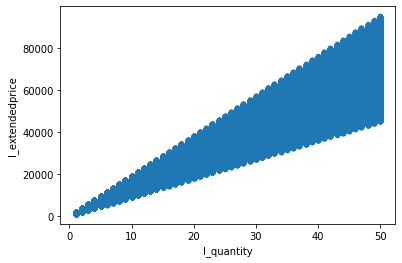

In [62]:
df_lineitem.plot.scatter(x = 'l_quantity', y = 'l_extendedprice')

#### Question 4 (6 bonus marks)
Write and execute an SQL query that retrieves for each nation name and stores it in the `nation` column, and the number of orders for the country and stores it in the `order_count` column.  Limit data to the year **2018**.  Store it in the variable `orders_by_country`.  To see the schema, login to the `tpch` at adminer at [`http://localhost:8080`](http://localhost:8080) using `tpch` as both the username and password. **(3 marks)**

In [78]:
%%sql tpch@tpch orders_by_country <<
SELECT n_name AS nation, count(o_orderdate) AS order_count
  FROM orders JOIN customer ON customer.c_custkey = orders.o_custkey
              JOIN nation ON nation.n_nationkey = customer.c_nationkey
 WHERE strftime('%Y', o_orderdate) = "2018"
 GROUP BY n_name;

Done.
Returning data to local variable orders_by_country


Convert the `orders_by_country` result into a pandas DataFrame `orders_by_country_df`.  **(1 mark)**

In [79]:
orders_by_country_df = orders_by_country.DataFrame()

Create a bar graph in Pandas that visualizes the information. **(2 marks)**

<AxesSubplot:xlabel='nation'>

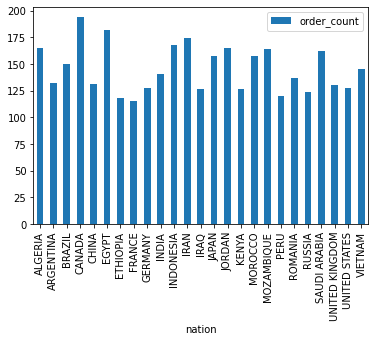

In [80]:
orders_by_country_df.plot.bar(x='nation', y='order_count')